In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [26]:
df = sns.load_dataset("penguins")
df = df.dropna()
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [27]:
#UNIVARIATE ANALYSIS
x = df["body_mass_g"]
y= df["flipper_length_mm"]
x.describe()


count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

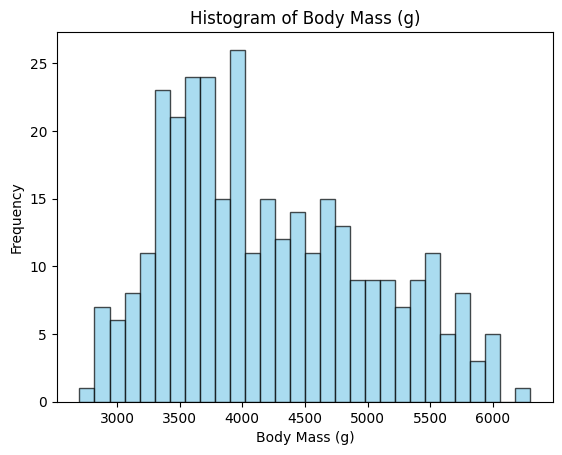

In [28]:
#histogram
plt.hist(x, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

## Univariate Analysis: Body Mass (`body_mass_g`)

The histogram represents the frequency distribution of the penguin body mass measured in grams.

Most observations are concentrated between approximately **3300 g and 4200 g**, indicating that the majority of penguins fall within this weight range. The distribution shows a **right-skewed (positively skewed)** pattern, as the tail extends further toward higher body mass values.

A small number of observations appear at the upper end of the distribution (above **5000 g**), which contribute to the skewness. These high-value observations are not necessarily outliers but may correspond to heavier penguin species, such as Gentoo penguins.

The histogram also suggests **possible multimodality**, which may be due to the presence of multiple penguin species with different body mass characteristics. This indicates that further analysis by categorical grouping (e.g., species-wise comparison) may provide additional insight.

Overall, the distribution is not perfectly normal, highlighting the need for additional diagnostic plots such as a box plot and a Q–Q plot to assess outliers and normality more precisely.


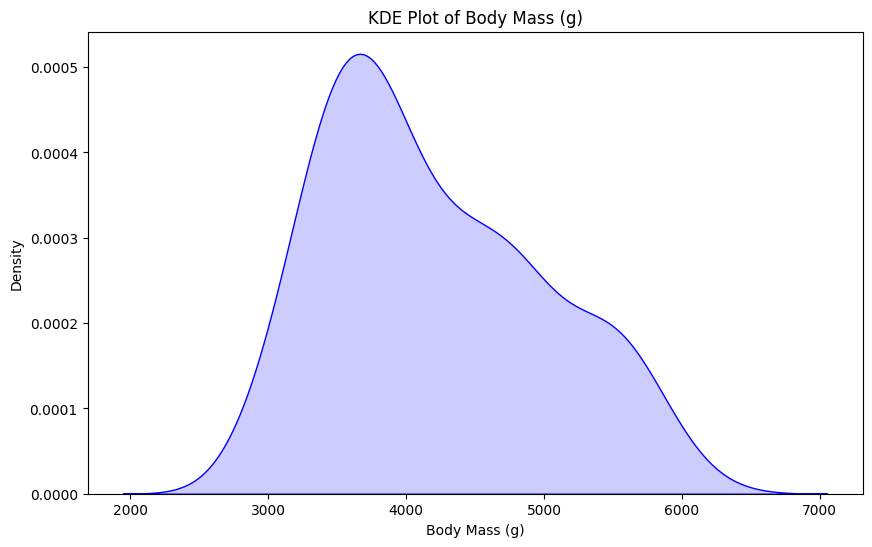

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x, color='blue', fill=True, alpha=0.2)
plt.title('KDE Plot of Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Density')
plt.show()

a) Peaks (modes)

Each peak corresponds to a region where data is concentrated

Single peak → unimodal distribution

Multiple peaks → multimodal (possibly multiple groups in data)

b) Spread

Wide curve → data is spread out

Narrow curve → data is concentrated

c) Skewness

Curve leaning left → negatively skewed

Curve leaning right → positively skewed

d) Tails

Observe if the curve extends far on one side → outliers or extreme values

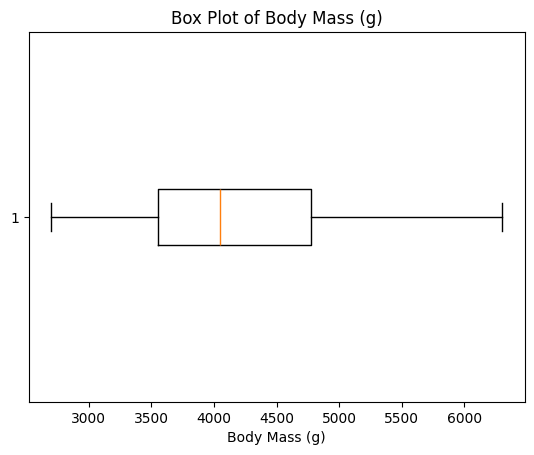

In [30]:
#box plot
plt.figure()
plt.boxplot(x, vert=False)
plt.title('Box Plot of Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.show()

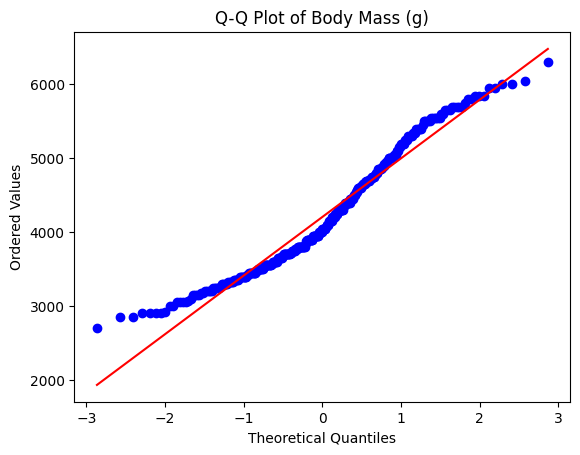

In [31]:
#qq -plot
plt.figure()
stats.probplot(x, dist="norm", plot=plt)
plt.title('Q-Q Plot of Body Mass (g)')
plt.xlabel('Theoretical Quantiles')
plt.show()

Straight line → normal

Curve at ends → skewness

Strong deviation → non-normal


A Q-Q plot (quantile-quantile plot) is a graphical tool to check if a dataset follows a particular theoretical distribution (like normal distribution). Here’s how to study and interpret it step by step:

1. Understand the axes

X-axis: Theoretical quantiles (what the data should look like if it follows the chosen distribution).

Y-axis: Sample quantiles (actual data points).

So, each point plots how your data compares to the expected distribution.

2. Check for the straight line

Most Q-Q plots have a diagonal reference line (y = x).

Interpretation:

Points on or close to the line → Data matches the theoretical distribution well.

Points above the line → Data quantiles are larger than expected (heavy tail).

Points below the line → Data quantiles are smaller than expected (light tail).

3. Check the tails

The ends of the plot (top-right and bottom-left) tell you about extreme values (outliers).

If points curve upward at the ends, the data has heavier tails than the theoretical distribution.

If points curve downward at the ends, the data has lighter tails.

4. Detect skewness

Right-skewed data: Points bend above the line at the top and below at the bottom.

Left-skewed data: Points bend below the line at the top and above at the botto


#bivariate analysis

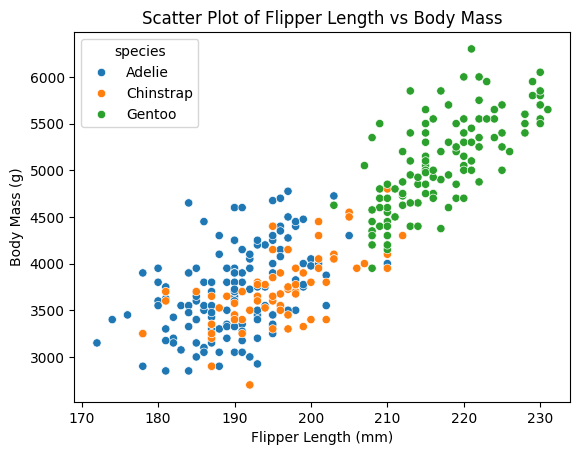

In [32]:
sns.scatterplot(data = df, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

SCATTER PLOT (Relationship)
What it answers

Are two variables related?

Linear or non-linear?

Clusters?

What to look for

Linear pattern → correlation

Curved → non-linear

Cloud → weak/no relation

Funnel shape → heteroscedasticity

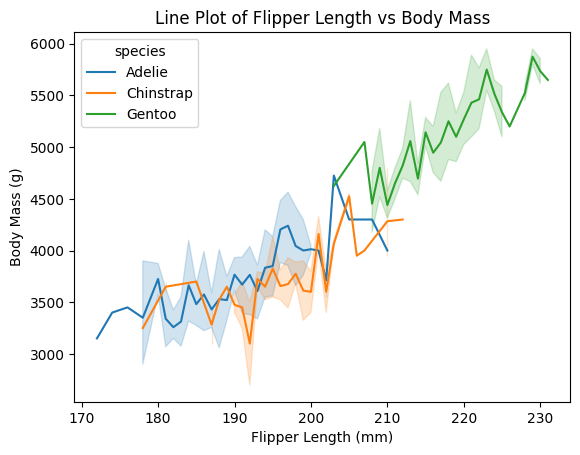

In [33]:
sns.lineplot(data=df, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.title('Line Plot of Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

LINE PLOT (Trend, Time-Series)
What it answers

How does a value change over time?

Is there trend, seasonality, spikes?

Important for

Time-series

Training/validation loss curves

Stock prices

Sensor readings

What to look for

Upward/downward trend

Sudden jumps

Cycles

📌 If x-axis is ordered → line plot

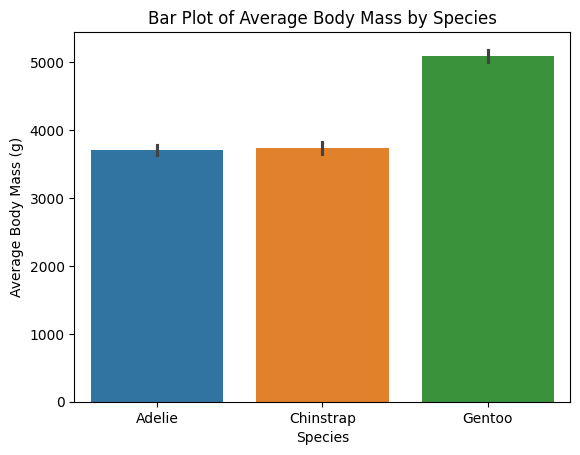

In [34]:
sns.barplot(data=df, x="species", y="body_mass_g", hue="species")
plt.title('Bar Plot of Average Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Average Body Mass (g)') 
plt.show()

#MultiVARIATE ANALYSIS

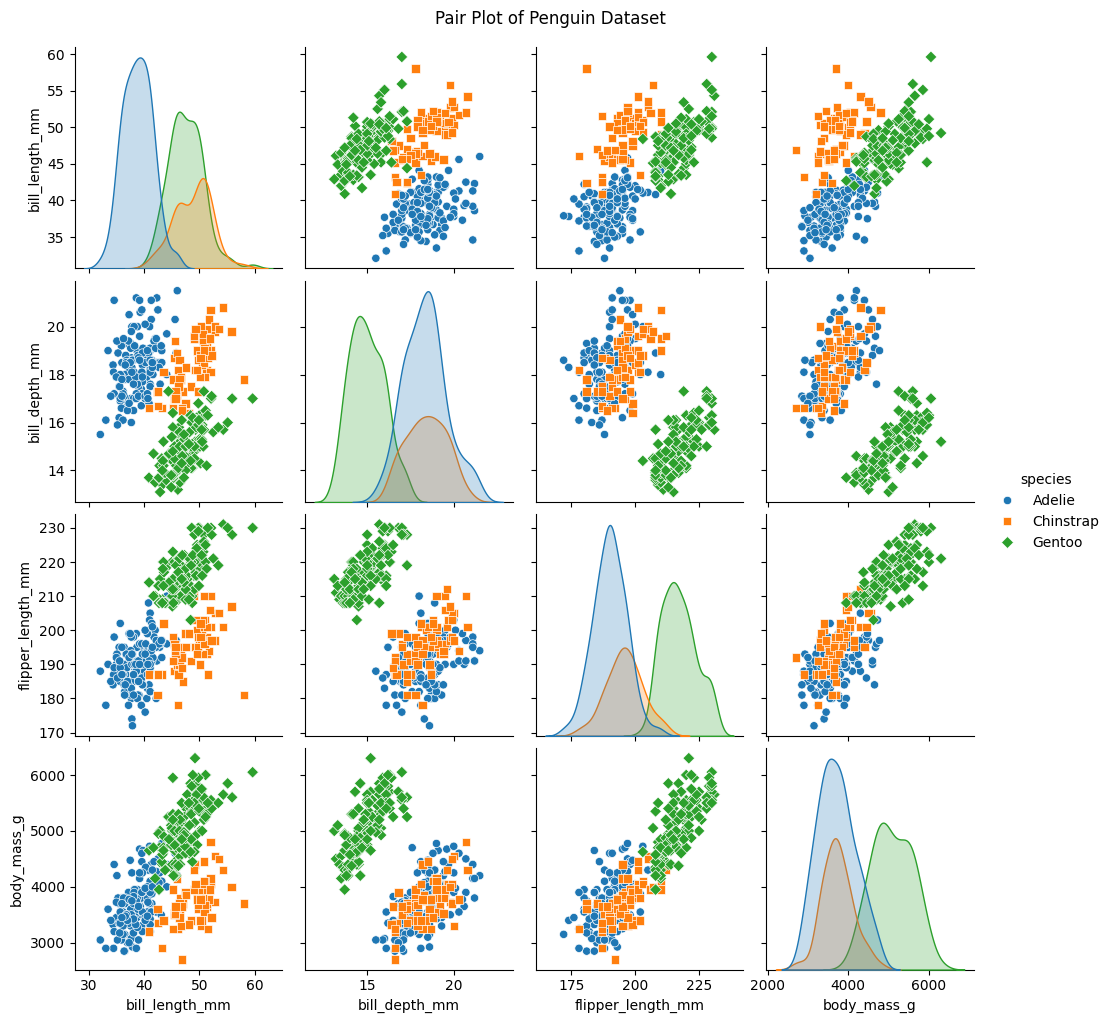

In [35]:
#pair plot
sns.pairplot(df, hue="species", diag_kind="kde", markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Penguin Dataset', y=1.02)
plt.show()

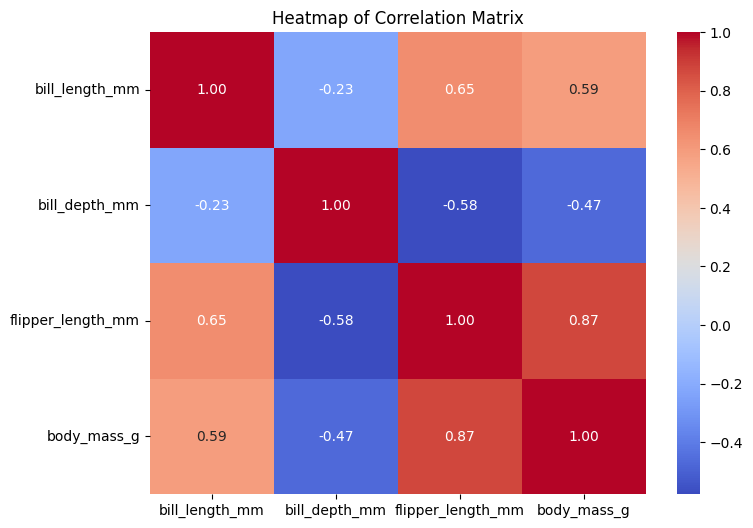

In [45]:
#Heatmap
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

/tmp/ipykernel_3583/3638196102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="species", y="body_mass_g", data=df, palette="Set2")


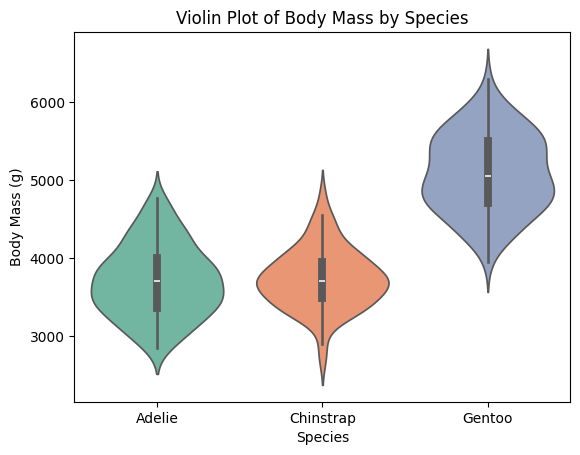

In [46]:
#violin plot
plt.figure()
sns.violinplot(x="species", y="body_mass_g", data=df, palette="Set2")
plt.title('Violin Plot of Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

A violin plot is a statistical visualization that combines features of a box plot and a kernel density plot (KDE) to show both the distribution and summary statistics of a continuous variable.